In [58]:
import pandas as pd
import numpy as np
import seaborn as sns

from matplotlib import pyplot as plt
%matplotlib inline
plt.style.use('fivethirtyeight')
params = {'legend.fontsize': 'medium',
          'figure.figsize': (10, 5),
         'axes.labelsize': 'medium',
         'axes.titlesize':'large',
         'xtick.labelsize':'medium',
         'ytick.labelsize':'medium'}
plt.rcParams.update(params)

In [2]:
!pwd

/Users/chun/Galvanize/capstones/capstone3/drugs-review-ratings/notebooks


In [44]:
train = pd.read_csv("../data/drugsComTrain_raw.tsv", delimiter='\t')

In [47]:
train = train.rename(columns = {"Unnamed: 0": "uniqueID"})

In [48]:
train.head()

,uniqueID,drugName,condition,review,rating,date,usefulCount
0,206461,Valsartan,Left Ventricular Dysfunction,"""It has no side effect, I take it in combinati...",9.0,"May 20, 2012",27
1,95260,Guanfacine,ADHD,"""My son is halfway through his fourth week of ...",8.0,"April 27, 2010",192
2,92703,Lybrel,Birth Control,"""I used to take another oral contraceptive, wh...",5.0,"December 14, 2009",17
3,138000,Ortho Evra,Birth Control,"""This is my first time using any form of birth...",8.0,"November 3, 2015",10
4,35696,Buprenorphine / naloxone,Opiate Dependence,"""Suboxone has completely turned my life around...",9.0,"November 27, 2016",37


In [9]:
train.shape

(161297, 6)

In [15]:
len(train['review'][0])

79

In [49]:
train.uniqueID.nunique()

161297

In [17]:
# number of drugs
train.drugName.nunique()

3436

In [18]:
# type of conditions
train.condition.nunique()

884

/Users/chun/opt/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


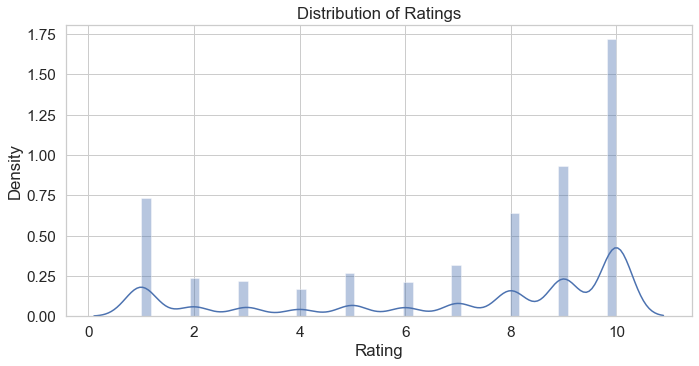

In [61]:
# ratings distribution
sns.set(font_scale = 1.4, style = 'whitegrid')
fig, ax = plt.subplots()
sns_1 = sns.distplot(train['rating'], ax = ax)
sns_1.set_title("Distribution of Ratings")
sns_1.set_xlabel("Rating");

/Users/chun/opt/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


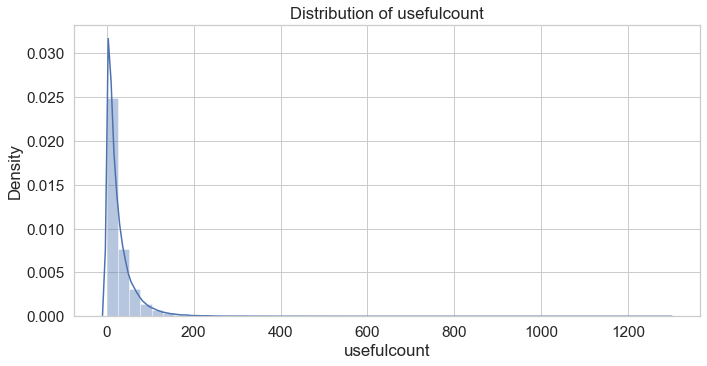

In [69]:
# distribution of useful count
sns.set(font_scale = 1.4, style = 'whitegrid')
fig, ax = plt.subplots()
sns_2 = sns.distplot(train['usefulCount'].dropna(), ax = ax)
sns_2.set_title("Distribution of usefulcount")
sns_2.set_xlabel("usefulcount");

In [32]:
train['rating'].value_counts().sort_index(ascending=False)

10.0    50989
9.0     27531
8.0     18890
7.0      9456
6.0      6343
5.0      8013
4.0      5012
3.0      6513
2.0      6931
1.0     21619
Name: rating, dtype: int64

In [33]:
train['review_len'] = train['review'].apply(lambda x: len(x))

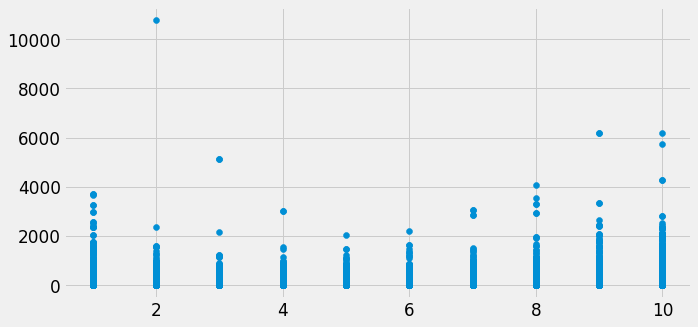

In [37]:
fig, ax = plt.subplots()
ax.scatter(train['rating'],train['review_len']);

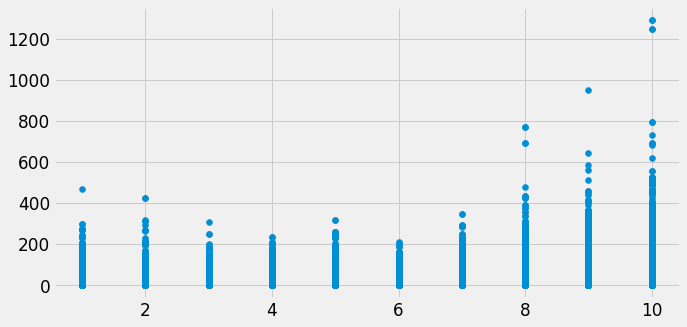

In [43]:
fig, ax = plt.subplots()
ax.scatter(train['rating'],train['usefulCount']);

In [50]:
# missing values
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 161297 entries, 0 to 161296
Data columns (total 7 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   uniqueID     161297 non-null  int64  
 1   drugName     161297 non-null  object 
 2   condition    160398 non-null  object 
 3   review       161297 non-null  object 
 4   rating       161297 non-null  float64
 5   date         161297 non-null  object 
 6   usefulCount  161297 non-null  int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 8.6+ MB


In [51]:
# convert the date into date time format
train['date'] = pd.to_datetime(train['date'])

In [53]:
train.describe()

,uniqueID,rating,usefulCount
count,161297.000000,161297.000000,161297.000000
mean,115923.585305,6.994377,28.004755
std,67004.445170,3.272329,36.403742
min,2.000000,1.000000,0.000000
25%,58063.000000,5.000000,6.000000
50%,115744.000000,8.000000,16.000000
75%,173776.000000,10.000000,36.000000
max,232291.000000,10.000000,1291.000000


/Users/chun/opt/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


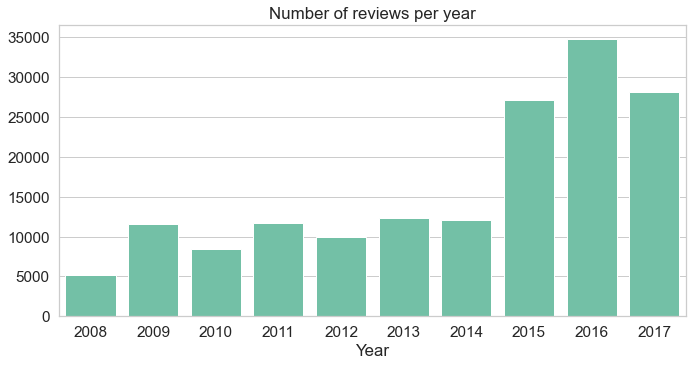

In [68]:
# number of reviews per year
df = train['date'].dt.year.value_counts().sort_index()
sns_ = sns.barplot(df.index, df.values, color = 'mediumaquamarine')
sns_.set_title("Number of reviews per year")
sns_.set_xlabel("Year");

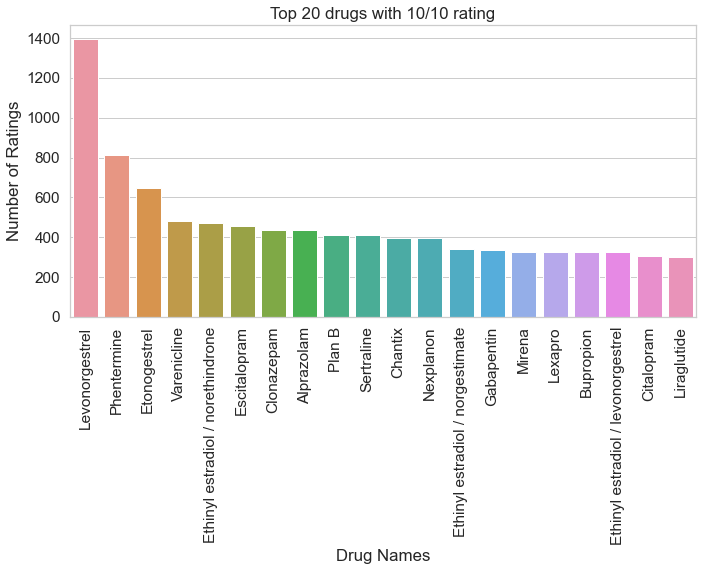

In [76]:
# top 20 drugs with 10/10 rating
rating = dict(train[train['rating'] == 10]['drugName'].value_counts())
drugname = list(rating.keys())
drugrating = list(rating.values())
sns_rating = sns.barplot(x = drugname[0:20], y = drugrating[0:20])
sns_rating.set_title("Top 20 drugs with 10/10 rating")
sns_rating.set_xlabel("Drug Names")
sns_rating.set_ylabel("Number of Ratings")
plt.setp(sns_rating.get_xticklabels(),rotation=90);

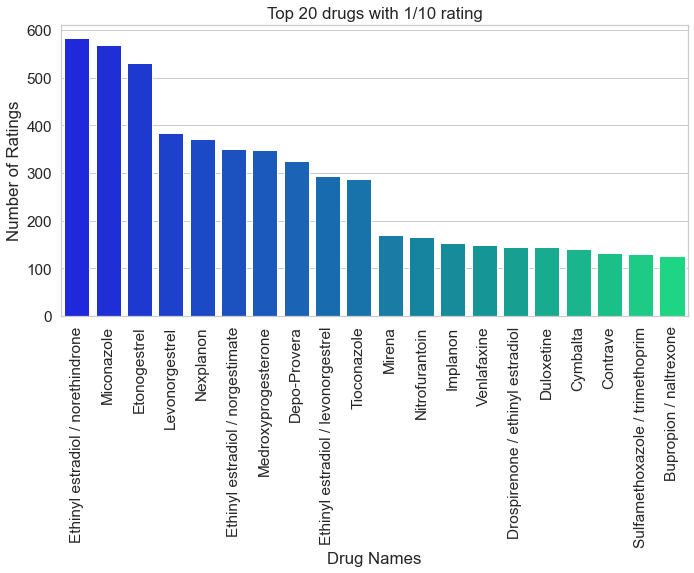

In [79]:
# top 20 drugs with 1/10 rating
rating = dict(train[train['rating'] == 1]['drugName'].value_counts())
drugname = list(rating.keys())
drugrating = list(rating.values())
sns_rating = sns.barplot(x = drugname[0:20], y = drugrating[0:20], palette='winter')
sns_rating.set_title("Top 20 drugs with 1/10 rating")
sns_rating.set_xlabel("Drug Names")
sns_rating.set_ylabel("Number of Ratings")
plt.setp(sns_rating.get_xticklabels(),rotation=90);